In [1]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.reshape((len(x_train), 28*28,)) / 255
x_test = x_test.reshape((len(x_test), 28*28,)) / 255

In [0]:
reduced_dim = 200
inp = keras.layers.Input(shape = (x_train.shape[1],))
encoded = keras.layers.Dense(reduced_dim, activation= 'relu')(inp)
decoded = keras.layers.Dense(28*28, activation = 'sigmoid')(encoded)

autoencoder = keras.models.Model(inp, decoded)
encoder = keras.models.Model(inp, encoded)

dec_inp = keras.layers.Input((reduced_dim,))
decoder = keras.models.Model(dec_inp, autoencoder.layers[-1](dec_inp))


In [13]:
# met = keras.metrics.binary_crossentropy(label_smoothing = 0.05)
autoencoder.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

autoencoder.fit(x_train,x_train,
                batch_size = 256,
                epochs = 30,
                verbose = 2,
                validation_data = (x_test, x_test))

Epoch 1/30
235/235 - 1s - loss: 0.3583 - accuracy: 0.0106 - val_loss: 0.3058 - val_accuracy: 0.0151
Epoch 2/30
235/235 - 1s - loss: 0.2929 - accuracy: 0.0212 - val_loss: 0.2858 - val_accuracy: 0.0236
Epoch 3/30
235/235 - 1s - loss: 0.2797 - accuracy: 0.0295 - val_loss: 0.2777 - val_accuracy: 0.0306
Epoch 4/30
235/235 - 1s - loss: 0.2739 - accuracy: 0.0342 - val_loss: 0.2735 - val_accuracy: 0.0356
Epoch 5/30
235/235 - 1s - loss: 0.2703 - accuracy: 0.0398 - val_loss: 0.2708 - val_accuracy: 0.0393
Epoch 6/30
235/235 - 1s - loss: 0.2678 - accuracy: 0.0440 - val_loss: 0.2686 - val_accuracy: 0.0447
Epoch 7/30
235/235 - 1s - loss: 0.2661 - accuracy: 0.0493 - val_loss: 0.2684 - val_accuracy: 0.0507
Epoch 8/30
235/235 - 1s - loss: 0.2647 - accuracy: 0.0527 - val_loss: 0.2658 - val_accuracy: 0.0541
Epoch 9/30
235/235 - 1s - loss: 0.2635 - accuracy: 0.0568 - val_loss: 0.2647 - val_accuracy: 0.0548
Epoch 10/30
235/235 - 1s - loss: 0.2626 - accuracy: 0.0600 - val_loss: 0.2639 - val_accuracy: 0.0585

In [10]:
score = autoencoder.evaluate(x_test,x_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
encoded_imgs_train = encoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)
decoded_imgs_test = decoder.predict(encoded_imgs_test)

Test loss: 0.25701382756233215
Test accuracy: 0.12349999696016312


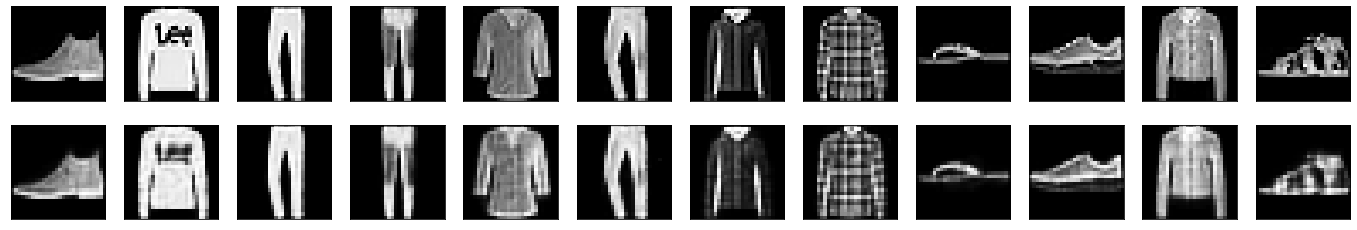

In [11]:
plt.figure(figsize=(24, 4))
for i in range(12):
    # display original
    ax = plt.subplot(2, 12, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 12, i + 1 + 12)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

fashion_classifier = Sequential()
fashion_classifier.add(Dense(256,
                             activation = 'relu',
                             input_shape = (reduced_dim,)))
fashion_classifier.add(Dense(256,
                             activation = 'relu'))
fashion_classifier.add(Dense(10,
                            activation = 'softmax'))

opt = keras.optimizers.Adam(lr = 0.001)
fashion_classifier.compile(opt,
                           loss = 'sparse_categorical_crossentropy',
                           metrics = ['accuracy'])




In [16]:
net = fashion_classifier.fit(encoded_imgs_train, y_train,
                       batch_size = 250,
                       validation_split = 0.2,
                       epochs = 50,
                       verbose = 2)

Epoch 1/50
192/192 - 0s - loss: 0.5845 - accuracy: 0.7942 - val_loss: 0.4363 - val_accuracy: 0.8443
Epoch 2/50
192/192 - 0s - loss: 0.4050 - accuracy: 0.8529 - val_loss: 0.3857 - val_accuracy: 0.8599
Epoch 3/50
192/192 - 0s - loss: 0.3638 - accuracy: 0.8682 - val_loss: 0.3858 - val_accuracy: 0.8562
Epoch 4/50
192/192 - 1s - loss: 0.3417 - accuracy: 0.8749 - val_loss: 0.3709 - val_accuracy: 0.8622
Epoch 5/50
192/192 - 0s - loss: 0.3200 - accuracy: 0.8823 - val_loss: 0.3321 - val_accuracy: 0.8772
Epoch 6/50
192/192 - 0s - loss: 0.3058 - accuracy: 0.8874 - val_loss: 0.3237 - val_accuracy: 0.8793
Epoch 7/50
192/192 - 0s - loss: 0.2932 - accuracy: 0.8908 - val_loss: 0.3380 - val_accuracy: 0.8772
Epoch 8/50
192/192 - 0s - loss: 0.2794 - accuracy: 0.8961 - val_loss: 0.3119 - val_accuracy: 0.8824
Epoch 9/50
192/192 - 0s - loss: 0.2629 - accuracy: 0.9026 - val_loss: 0.3185 - val_accuracy: 0.8827
Epoch 10/50
192/192 - 0s - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.3269 - val_accuracy: 0.8809

In [18]:
test_loss, test_acc = fashion_classifier.evaluate(encoded_imgs_test,  y_test)
print(f"""Test loss: {test_loss}
Test accuracy: {test_acc}""")

313/313 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.8887
Test loss: 0.48892587423324585
Test accuracy: 0.888700008392334


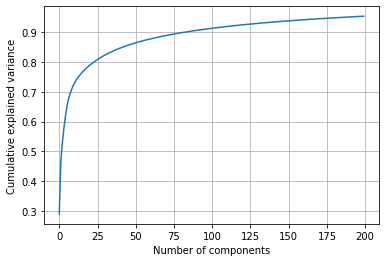

In [19]:
from sklearn.decomposition import PCA

decomposed_data = PCA(reduced_dim)
decomposed_data.fit(x_train)
plt.plot(np.cumsum(decomposed_data.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [0]:
pca_train = decomposed_data.transform(x_train)
pca_test = decomposed_data.transform(x_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
fashion_classifier = Sequential()
fashion_classifier.add(Dense(256,
                             activation = 'relu',
                             input_shape = (reduced_dim,)))
fashion_classifier.add(Dense(256,
                             activation = 'relu'))
fashion_classifier.add(Dense(10,
                            activation = 'softmax'))

opt = keras.optimizers.Adam(lr = 0.001)
fashion_classifier.compile(opt,
                           loss = 'sparse_categorical_crossentropy',
                           metrics = ['accuracy'])

net = fashion_classifier.fit(pca_train, y_train,
                       batch_size = 250,
                       validation_split = 0.2,
                       epochs = 50,
                       verbose = 2)

Epoch 1/50
192/192 - 1s - loss: 0.5309 - accuracy: 0.8197 - val_loss: 0.3758 - val_accuracy: 0.8656
Epoch 2/50
192/192 - 0s - loss: 0.3291 - accuracy: 0.8823 - val_loss: 0.3330 - val_accuracy: 0.8808
Epoch 3/50
192/192 - 0s - loss: 0.2830 - accuracy: 0.8979 - val_loss: 0.3170 - val_accuracy: 0.8858
Epoch 4/50
192/192 - 0s - loss: 0.2483 - accuracy: 0.9106 - val_loss: 0.3103 - val_accuracy: 0.8867
Epoch 5/50
192/192 - 0s - loss: 0.2223 - accuracy: 0.9188 - val_loss: 0.3046 - val_accuracy: 0.8907
Epoch 6/50
192/192 - 0s - loss: 0.1954 - accuracy: 0.9298 - val_loss: 0.3044 - val_accuracy: 0.8932
Epoch 7/50
192/192 - 0s - loss: 0.1761 - accuracy: 0.9365 - val_loss: 0.3149 - val_accuracy: 0.8887
Epoch 8/50
192/192 - 0s - loss: 0.1546 - accuracy: 0.9443 - val_loss: 0.3122 - val_accuracy: 0.8932
Epoch 9/50
192/192 - 0s - loss: 0.1370 - accuracy: 0.9512 - val_loss: 0.3311 - val_accuracy: 0.8907
Epoch 10/50
192/192 - 0s - loss: 0.1218 - accuracy: 0.9579 - val_loss: 0.3425 - val_accuracy: 0.8909

In [22]:
test_loss, test_acc = fashion_classifier.evaluate(pca_test, y_test, batch_size=256, verbose=2)
print(f"""Test loss: {test_loss}
Test acc: {test_acc}""")


40/40 - 0s - loss: 0.9341 - accuracy: 0.8865
Test loss: 0.9341319799423218
Test acc: 0.8865000009536743


In [23]:
p = fashion_classifier.predict(pca_test)
print(y_test[:20])
print(np.argmax(p, axis = 1)[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 4 8 0]


In [0]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=reduced_dim, learning_rate=0.01, random_state=0, verbose=True)
rbm_output=rbm.fit(x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -224.70, time = 28.87s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -209.28, time = 32.42s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -205.50, time = 32.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -199.16, time = 32.37s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -195.53, time = 32.33s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -197.95, time = 32.22s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -195.23, time = 32.37s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -194.76, time = 32.27s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -193.83, time = 32.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -194.62, time = 32.11s


In [0]:
rbm_train = rbm_output.transform(x_train)
rbm_test = rbm_output.transform(x_test)

In [0]:
fashion_classifier = Sequential()
fashion_classifier.add(Dense(256,
                             activation = 'relu',
                             input_shape = (reduced_dim,)))
fashion_classifier.add(Dense(256,
                             activation = 'relu'))
fashion_classifier.add(Dense(10,
                            activation = 'softmax'))

opt = keras.optimizers.Adam(lr = 0.001)
fashion_classifier.compile(opt,
                           loss = 'sparse_categorical_crossentropy',
                           metrics = ['accuracy'])

net = fashion_classifier.fit(rbm_train, y_train,
                       batch_size = 250,
                       validation_split = 0.2,
                       epochs = 50,
                       verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 1s - loss: 0.5815 - acc: 0.7910 - val_loss: 0.4393 - val_acc: 0.8328
Epoch 2/15
 - 1s - loss: 0.4188 - acc: 0.8459 - val_loss: 0.4189 - val_acc: 0.8442
Epoch 3/15
 - 1s - loss: 0.3929 - acc: 0.8529 - val_loss: 0.3939 - val_acc: 0.8508
Epoch 4/15
 - 1s - loss: 0.3759 - acc: 0.8599 - val_loss: 0.3815 - val_acc: 0.8578
Epoch 5/15
 - 1s - loss: 0.3642 - acc: 0.8634 - val_loss: 0.3757 - val_acc: 0.8608
Epoch 6/15
 - 1s - loss: 0.3540 - acc: 0.8659 - val_loss: 0.3669 - val_acc: 0.8646
Epoch 7/15
 - 1s - loss: 0.3510 - acc: 0.8673 - val_loss: 0.3630 - val_acc: 0.8642
Epoch 8/15
 - 1s - loss: 0.3383 - acc: 0.8720 - val_loss: 0.3599 - val_acc: 0.8663
Epoch 9/15
 - 1s - loss: 0.3327 - acc: 0.8738 - val_loss: 0.3719 - val_acc: 0.8581
Epoch 10/15
 - 1s - loss: 0.3252 - acc: 0.8762 - val_loss: 0.3552 - val_acc: 0.8676
Epoch 11/15
 - 1s - loss: 0.3192 - acc: 0.8789 - val_loss: 0.3502 - val_acc: 0.8673
Epoch 12/15
 - 1s - loss: 0.3170 - 

In [0]:
test_loss, test_acc = fashion_classifier.evaluate(rbm_test, y_test, batch_size=256, verbose=2)
print(f"""Test loss: {test_loss}
Test acc: {test_acc}""")


Test loss: 0.36771408627033236
Test acc: 0.8632
